<a href="https://colab.research.google.com/github/cadyngo/EAS-Math-for-AI/blob/main/05_Vector_Calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In this lab we explore how **vector calculus** underpins:

- Gradient descent optimization  
- The chain rule and backpropagation  
- Understanding model behavior via the loss surface  



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)


## 1. Derivatives via Difference Quotients

For a scalar function $ f : \mathbb{R} \to \mathbb{R} $, the **difference quotient**

$
\frac{\delta y}{\delta x} = \frac{f(x + \delta x) - f(x)}{\delta x}
$

gives the slope of the secant line between two nearby points.  
Taking the limit $ \delta x \to 0 $ gives the **derivative**

$
\frac{df}{dx}(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}.
$

In practice, we approximate this limit with a small step size $ h $.

In this first demo, we will:

- Pick a scalar function $ f(x) = \sin(x) + \cos(x) $
- Compute the numerical derivative using a small $ h $
- Compare it to the analytic derivative $f'(x) = \cos(x) - \sin(x)$
- Visualize the agreement between both


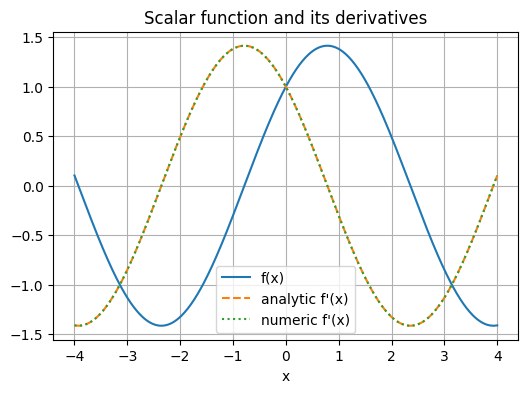

In [ ]:
def f_scalar(x):
    """f(x) = sin(x) + cos(x)"""
    return #TODO

def df_scalar_analytic(x):
    """f'(x) = cos(x) - sin(x)"""
    return #TODO

def df_scalar_numeric(x, h=1e-5):
    """Centered finite-difference approximation of f'(x)."""
    return #TODO

xs = np.linspace(-4, 4, 400)
df_ana = df_scalar_analytic(xs)
df_num = df_scalar_numeric(xs)

plt.figure(figsize=(6,4))
plt.plot(xs, f_scalar(xs), label="f(x)")
plt.plot(xs, df_ana, linestyle="--", label="analytic f'(x)")
plt.plot(xs, df_num, linestyle=":", label="numeric f'(x)")
plt.xlabel("x")
plt.legend()
plt.title("Scalar function and its derivatives")
plt.grid(True)
plt.show()


### Discussion

- The numerical derivative approximates the analytical one very closely for a small step size \( h \).
- This same idea (difference quotients) is used later for **gradient checking**: we verify an analytic gradient implementation by comparing it to finite differences.
- In higher dimensions, we just apply the same idea one coordinate at a time.


## 2. Gradients and Partial Derivatives

For a function $f : \mathbb{R}^n \to \mathbb{R}$, the **partial derivatives**
measure how $ f $ changes when we vary one coordinate and keep the others fixed.

For $ f(x_1, x_2) = x_1^2 x_2 + x_1 x_2^3 $ we have (from the product and chain rules):

$
\frac{\partial f}{\partial x_1} = 2 x_1 x_2 + x_2^3, \quad
\frac{\partial f}{\partial x_2} = x_1^2 + 3 x_1 x_2^2.
$

The **gradient** collects these into a row vector

$
\nabla_x f(x_1,x_2) =
\begin{bmatrix}
\frac{\partial f}{\partial x_1} &
\frac{\partial f}{\partial x_2}
\end{bmatrix}.
$

In this demo, we will:
- Plot the scalar field $f(x_1,x_2)$ as contours
- Plot gradient vectors (arrows) pointing in the direction of **steepest ascent**
- Observe how the **negative** gradient points downhill – the direction used in gradient descent


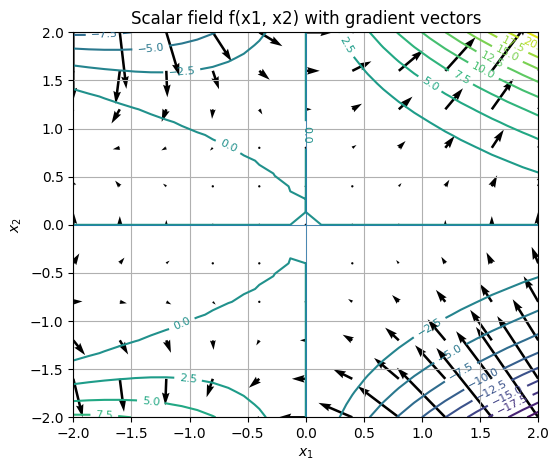

In [ ]:
def f_2d(x1, x2):
    return #TODO

def grad_f_2d(x1, x2):
    df_dx1 = #TODO
    df_dx2 = #TODO
    return df_dx1, df_dx2

# grid
x1 = np.linspace(-2, 2, 31)
x2 = np.linspace(-2, 2, 31)
X1, X2 = np.meshgrid(x1, x2)
Z = f_2d(X1, X2)

# gradients on a coarser grid for quiver plot
x1_s = np.linspace(-2, 2, 11)
x2_s = np.linspace(-2, 2, 11)
X1s, X2s = np.meshgrid(x1_s, x2_s)
G1, G2 = grad_f_2d(X1s, X2s)

plt.figure(figsize=(6,5))
cs = plt.contour(X1, X2, Z, levels=20)
plt.clabel(cs, inline=True, fontsize=8)
plt.quiver(X1s, X2s, G1, G2, angles='xy')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scalar field f(x1, x2) with gradient vectors")
plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.grid(True)
plt.show()


### Discussion

- Each arrow shows the gradient at that point. It points in the direction where $ f $ increases fastest.
- If we flipped the arrows (i.e. used $-\nabla f$), we’d get the direction of **steepest descent**.
- Gradient descent is nothing more than repeatedly taking small steps in the **negative gradient** direction to minimize a loss function.


## 3. Gradient Descent: From Calculus to Optimization

For a differentiable function $ f : \mathbb{R}^d \to \mathbb{R} $, **gradient descent** updates parameters via

$
\theta_{t+1} = \theta_t - \eta \, \nabla_\theta f(\theta_t),
$

where $ \eta > 0 $ is the learning rate.

We’ll begin in 1D with a simple convex function, then move to 2D:

- 1D: $ f(w) = w^2 $, with derivative $f'(w) = 2w $.
- 2D: $ f(w_1, w_2) = \tfrac{1}{2}(w_1^2 + 10 w_2^2) $, which has a steep valley in the $ w_2 $ direction.


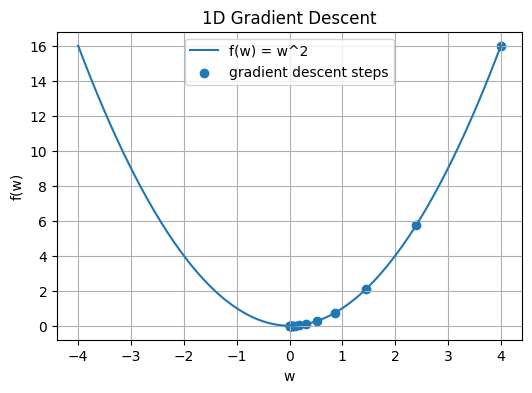

In [ ]:
def f_1d(w):
    return w**2

def df_1d(w):
    return 2*w

eta = 0.2
w = 4.0
ws = [w]
fs = [f_1d(w)]

for t in range(15):
    grad = df_1d(w)
    w = w - eta * grad
    ws.append(w)
    fs.append(f_1d(w))

# Plot objective and optimization path
w_plot = np.linspace(-4, 4, 200)
plt.figure(figsize=(6,4))
plt.plot(w_plot, f_1d(w_plot), label="f(w) = w^2")
plt.scatter(ws, fs, marker='o', label="gradient descent steps")
plt.xlabel("w")
plt.ylabel("f(w)")
plt.title("1D Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


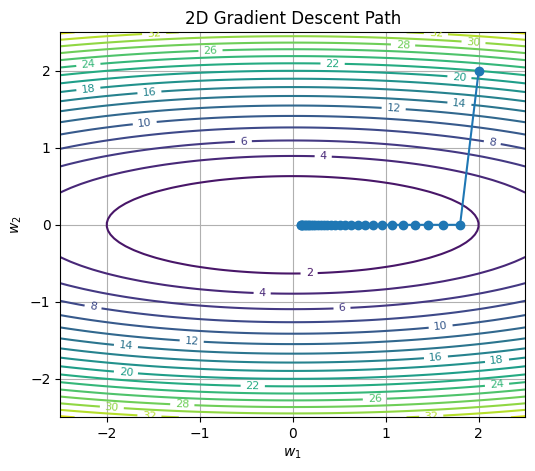

In [ ]:
def f_2d_quad(w):
    w1, w2 = w
    return #TODO

def grad_f_2d_quad(w):
    w1, w2 = w
    return np.array([w1, 10*w2])

eta = 0.1
w = np.array([2.0, 2.0])
ws_hist = [w.copy()]

for t in range(30):
    w = w - eta * grad_f_2d_quad(w)
    ws_hist.append(w.copy())

ws_hist = np.array(ws_hist)

# contour plot
w1 = np.linspace(-2.5, 2.5, 100)
w2 = np.linspace(-2.5, 2.5, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = f_2d_quad(np.array([W1, W2]))

plt.figure(figsize=(6,5))
cs = plt.contour(W1, W2, Z, levels=20)
plt.clabel(cs, inline=True, fontsize=8)
plt.plot(ws_hist[:,0], ws_hist[:,1], marker="o")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.title("2D Gradient Descent Path")
plt.grid(True)
plt.show()


### Discussion

- In 1D, gradient descent simply walks downhill along the curve.
- In 2D, the path can look “zig-zaggy” in narrow valleys where curvature differs across directions.
- This directly reflects the geometry encoded in the gradient and (implicitly) in higher-order derivatives like the Hessian.
- Later, for models like linear regression and neural networks, the same update rule is applied to a **loss function** instead of these toy functions.


## 4. Chain Rule and Backpropagation on a Toy Neural Network

Deep networks compute outputs via many layers of function composition:

$
y = (f_K \circ f_{K-1} \circ \cdots \circ f_1)(x).
$

The **chain rule** tells us how to differentiate such compositions:

$
\frac{d}{dx} (g \circ f)(x) = g'(f(x)) \, f'(x).
$

Backpropagation is just **systematic application of the chain rule** to compute gradients of a loss with respect to all parameters efficiently.

### Our toy network

We’ll use a very small fully connected network:

- Input: scalar $x$
- Hidden layer: 2 units with tanh activation
- Output: scalar $\hat{y}$
- Parameters:
  - $W_1 \in \mathbb{R}^{2 \times 1}, \, b_1 \in \mathbb{R}^{2}$
  - $ W_2 \in \mathbb{R}^{1 \times 2}, \, b_2 \in \mathbb{R}$

Forward pass:

$
h = \tanh(W_1 x + b_1), \quad
\hat{y} = W_2 h + b_2,
\quad
L = \frac{1}{2}(\hat{y} - y)^2.
$

We will:
1. Implement the forward pass and store intermediate values.
2. Derive and implement the backward pass using the chain rule.
3. Numerically check the gradients via finite differences (gradient checking).


In [ ]:
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - np.tanh(x)**2

def forward_network(x, params):
    """
    x: shape (N, 1)
    params: dict with W1, b1, W2, b2
    """
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]

    #TODO
    return #TODO

def mse_loss(y_hat, y):
    # 1/2 * mean squared error
    return #TODO


In [ ]:
def backward_network(y_hat, y, cache, params):
    """
    Compute gradients of loss L wrt parameters using backprop.
    """
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]
    x, z1, h, z2 = cache["x"], cache["z1"], cache["h"], cache["z2"]
    N = x.shape[0]

    # dL/dy_hat = (y_hat - y) / N (mean over batch)
    dL_dyhat = (y_hat - y) / N # (N,1)

    # y_hat = z2, so dL/dz2 = dL/dy_hat
    dL_dz2 = dL_dyhat                 # (N,1)

    # z2 = h W2^T + b2
    # gradients wrt W2, b2, and h
    dL_dW2 = (dL_dz2.T @ h)           # (1,2)
    dL_db2 = np.sum(dL_dz2, axis=0)   # (1,)
    dL_dh  = dL_dz2 @ W2              # (N,2)

    # h = tanh(z1)
    dL_dz1 = dL_dh * dtanh(z1)        # (N,2)

    # z1 = x W1^T + b1
    dL_dW1 = dL_dz1.T @ x             # (2,1)
    dL_db1 = np.sum(dL_dz1, axis=0)   # (2,)

    grads = {
        "W1": dL_dW1,
        "b1": dL_db1,
        "W2": dL_dW2,
        "b2": dL_db2
    }
    return grads


In [ ]:
# Create a tiny dataset
rng = np.random.default_rng(0)
N = 5
x = rng.uniform(-1, 1, size=(N, 1))
true_w = 2.0
y = true_w * x + 0.3  # simple linear relation

# Initialize parameters randomly
params = {
    "W1": rng.normal(scale=0.5, size=(2,1)),
    "b1": rng.normal(scale=0.1, size=(2,)),
    "W2": rng.normal(scale=0.5, size=(1,2)),
    "b2": rng.normal(scale=0.1, size=(1,))
}

# Compute analytic gradients
y_hat, cache = forward_network(x, params)
loss = mse_loss(y_hat, y)
grads = backward_network(y_hat, y, cache, params)

print("Initial loss:", loss)

def numerical_grad(param_name, params, x, y, eps=1e-5):
    """
    Compute numeric gradient for param_name via finite differences.
    """
    num_grad = np.zeros_like(params[param_name])
    it = np.nditer(params[param_name], flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        orig_val = params[param_name][idx]

        params[param_name][idx] = orig_val + eps
        y_hat_plus, _ = forward_network(x, params)
        loss_plus = mse_loss(y_hat_plus, y)

        params[param_name][idx] = orig_val - eps
        y_hat_minus, _ = forward_network(x, params)
        loss_minus = mse_loss(y_hat_minus, y)

        num_grad[idx] = (loss_plus - loss_minus) / (2 * eps)
        params[param_name][idx] = orig_val
        it.iternext()
    return num_grad

for pname in ["W1", "b1", "W2", "b2"]:
    g_num = numerical_grad(pname, params, x, y)
    g_ana = grads[pname]
    diff_norm = np.linalg.norm(g_num - g_ana)
    denom = np.linalg.norm(g_num) + np.linalg.norm(g_ana) + 1e-12
    rel_error = diff_norm / denom
    print(f"{pname}: relative error = {rel_error:.2e}")


Initial loss: 1.1283379019699833
W1: relative error = 1.75e-11
b1: relative error = 1.32e-11
W2: relative error = 4.11e-12
b2: relative error = 1.25e-11


### Discussion

- The relative errors between analytic and numeric gradients should be very small (e.g. $ < 10^{-6} $).
- This is **gradient checking**, a practical way to validate backprop implementations using finite differences!
- Notice how the backward computation traverses the network **in reverse**, reusing intermediate values: this is reverse-mode automatic differentiation.


## 5. Linear Regression: Loss, Gradient, and Optimization Path

Consider the linear model

$
y = \Phi \theta,
$

where:
- $ \theta \in \mathbb{R}^D $ are parameters,
- $ \Phi \in \mathbb{R}^{N \times D} $ is the design matrix,
- $ y \in \mathbb{R}^N $ are observations.

We use the **least-squares loss**

$
L(\theta) = \|y - \Phi \theta\|^2.
$

The gradient of this loss with respect to $ \theta $ is

$
\nabla_\theta L(\theta) = -2 \Phi^\top (y - \Phi \theta).
$

This is exactly the type of gradient used in gradient descent for linear regression.  
In this section, we’ll:

1. Build a simple 1D regression problem with parameters $ \theta = (\theta_0, \theta_1) $ (intercept + slope).
2. Compute the loss over a grid in $ (\theta_0, \theta_1) $ to visualize the loss surface.
3. Run gradient descent and overlay the optimization path on the contour plot.


In [ ]:
# Create synthetic data: y = 1.5 + 2.0 x + noise
rng = np.random.default_rng(1)
N = 50
x_data = rng.uniform(-1, 1, size=(N, 1))
y_true = 1.5 + 2.0 * x_data
y_data = y_true + rng.normal(scale=0.1, size=y_true.shape)
y_data = y_data.ravel()

# Design matrix: [1, x]
Phi = np.concatenate([np.ones_like(x_data), x_data], axis=1)  # (N, 2)


In [ ]:
def loss_linreg(theta, Phi, y):
    residual = #todo
    return np.sum(residual**2)

def grad_linreg(theta, Phi, y):
    residual = #todo
    return #todo

# Run gradient descent
theta = np.array([0.0, 0.0])  # [theta0, theta1]
eta = 0.05
theta_hist = [theta.copy()]
loss_hist = [loss_linreg(theta, Phi, y_data)]

for t in range(50):
    g = grad_linreg(theta, Phi, y_data)
    theta = theta - eta * g
    theta_hist.append(theta.copy())
    loss_hist.append(loss_linreg(theta, Phi, y_data))

theta_hist = np.array(theta_hist)
print("Final theta:", theta)
print("Final loss:", loss_hist[-1])


Final theta: [-2.3310e+30 -1.3257e+29]
Final loss: 2.7316135377197392e+62


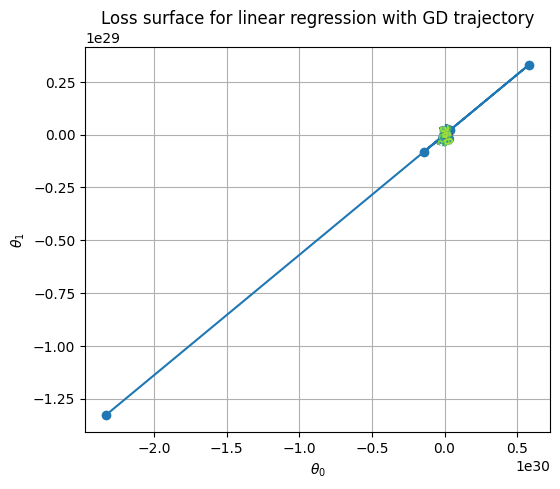

In [ ]:
theta0_vals = np.linspace(-1, 3, 100)
theta1_vals = np.linspace(0, 4, 100)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
L_grid = np.zeros_like(T0)

for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        theta_ij = np.array([T0[i, j], T1[i, j]])
        L_grid[i, j] = loss_linreg(theta_ij, Phi, y_data)

plt.figure(figsize=(6,5))
cs = plt.contour(T0, T1, L_grid, levels=30)
plt.clabel(cs, inline=True, fontsize=8)
plt.plot(theta_hist[:,0], theta_hist[:,1], marker="o")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title("Loss surface for linear regression with GD trajectory")
plt.grid(True)
plt.show()


### Discussion

- The loss surface is a convex bowl in the $ (\theta_0, \theta_1) $ plane.
- Gradient descent follows a path down the bowl to reach a minimum.
- The final parameters should be close to the true values used to generate the data.
- For more complex models (e.g., deep networks), the loss surface is much less simple, but the same gradient-based intuition applies.


## Summary and Suggested Exploration

In this lab you have:

- Seen how **derivatives** arise from difference quotients and how to approximate them numerically.
- Computed **gradients** of multivariate functions and visualized them as arrows on contour plots.
- Implemented **gradient descent** in 1D and 2D, connecting vector calculus to optimization.
- Built a tiny neural network and derived its gradients by hand using the **chain rule** (backpropagation).
- Used **gradient checking** to verify your implementation.
- Visualized a **loss landscape** for linear regression and the optimization trajectory.

### Suggested Exploration

1. **Experiment with learning rates**
   - Try different $ \eta $ values in gradient descent.
   - Observe divergence for large $ \eta $, and slow convergence for very small $ \eta $.

2. **Change the activation function**
   - Replace `tanh` with ReLU in the toy network.
   - Update the derivative and backprop code accordingly.

3. **Add regularization**
   - Modify the linear regression loss to include an $ \ell_2 $ penalty $ \lambda \|\theta\|^2 $.
   - Derive and implement the new gradient.

4. **More complex networks**
   - Add a second hidden layer and extend the backprop code.
   - Re-use the gradient checking function to validate your new implementation.

Remember, these exercises are all different ways of applying the same core tools:
**partial derivatives, gradients, the chain rule, and gradient-based optimization**.
